# Chapitre 4 - Entraîner des modèles linéaires

On va aller voir de manière plus approfondie comment les choses fonctionnent et comment choisir un modèle approprié.

## Setup

In [2]:
#python >= 3.5 nécessaire
import sys
assert sys.version_info >= (3, 5)

#scikit-learn >= 0.20 nécessaire
import sklearn
assert sklearn.__version__ >= "0.20"

# Autres imports
import numpy as np
import os

# pour rendre les output stables au fil des runs
np.random.seed(42)

# pour tracer de jolis graphes
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# où sauvegarder les figures
PROJECT_ROOT_DIR = ".."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# ignorer les warnings inutiles (voir SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Régression linéaire

Un modèle linéaire fait des prédictions en calculant simplement une somme pondérée des caractéristiques en entrée (*input features*), plus une constante appelée terme de biais (*bias term*).

*Prédiction du modèle de régression linéaire*
$$
\hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{1}x_{1} + \cdots + \theta_{n}x_{n}
$$

Dans cette équation :
- $\hat{y}$ est la *valeur prédite*
- $n$ est le nombre de caractéristiques (*features*)
- $x_{i}$ est la $i^{ème}$ valeur de caractéristique (*feature value*)
- $\theta_{j}$ est le $j^{ème}$ paramètre du modèle (qui inclut le terme de biais $\theta_{0}$ les poids des caractéristiques (*feature weight*) $\theta_{1}$, $\theta_{2}$, ..., $\theta_{n}$)

Cette équation peut être écrite de manière plus concise en utilisant une forme vectorisée :

*Prédiction du modèle de régression linéaire (forme vectorisée)*
$$
\hat{y} = h_{\theta}(x) = \theta \cdot x
$$

Dans cette équation :
- $\theta$ est le *vecteur de paramètre* (*parameter vector*) du modèle, contenant le terme de biais $\theta_{0}$ et la pondération des caractéristiques $\theta_{1}$ à $\theta_{n}$.
- $x$ est le *vecteur de caractéristique* (*feature vector*), contenant $x_{0}$ à $x_{n}$, avec $x_{0}$ toujours égal à 1
- $\theta \cdot x$ est le produit scalaire des vecteurs $\theta$ et $x$, qui est bien sûr égal à $\theta_{1}x_{1} + \theta_{1}x_{1} + \cdots + \theta_{n}x_{n}$
- $h_{\theta}$ est la fonction d'hypothèse, utilisant les paramètres du modèle $\theta$.

Voilà pour la modèle de régression linéaire. On va maintenant voir comment l'entraîner ; il va avoir besoin qu'on règle ses paramètres pour qu'il corresponde le plus au JdE.

Dans ce but, on va d'abord avoir besoin d'une mesure de la façon dont le modèle s'ajuste bien (ou mal) au JdE ; on va utiliser la RMSE (*Root Mean Square Error*) pour ça. Dincn, pour entraîner un modèle de régression linéaire, on va avoir besoin de *trouver la valeur de $\theta$ qui minimise* le RMSE. Dans la pratique, c'est plus simple de minimser la MSE (*Mean Squared Errpr*) que la RMSE, et ça conduit au même résultat (parce que la valeur qui minimise une fonction minimise aussi sa racine carrée).

La MSE d'une hypothèse $h_{\theta}$ d'un JdE X est calculé selon l'équation suivante :

$$
MSE(X, h_{\theta}) = \frac{1}{m}\sum_{i=1}^{m}(\theta^{⊺}x^{(i)}-y^{(i)})^2
$$

On écrit $h_{\theta}$ au lieu de $h$ pour être clair que le modèle est paramétré par le vecteur $\theta$. Pour simplifier les notations, on va écrire MSE($\theta$) au lieu de $MSE(X, h_{\theta})$


### L'équation normale (the normal equation)

Pour trouver la valeur de $\theta$ qui minimise la fonction de coût, il y a une solution en forme fermée (*closed form solution*), en d'autres mots, une equation mathématique qui donne le résultat directement. C'est ce qu'on appelle l'équation normale :

$$
\hat{\theta} = (X^{⊺}X)^{-1} X^{⊺} y
$$

Dans cette équation :
- $\hat{\theta}$ est la valeur de $\theta$ qui minimise la fonction de coût
- $y$ est le vecteur des valeurs cibles contenant $y^{1}$ à $y^{m}$

On va maintenant générer des données qui ressemblent à quelque chose de linéaire pour tester cette equation :

Saving figure generated_data_plot


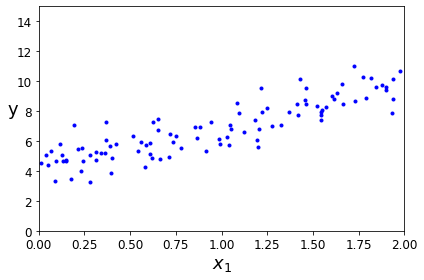

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# tracer le graphe
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.axis([0, 2, 0 ,15])
save_fig("generated_data_plot")
plt.show()

Maintenant, on va calculer $\hat{\theta}$ en utilisant l'équation normale. Onva utiliser la fonction `inv()` du module d'algèrbe linéaire de NumPy (`np.linalg`) pour calculer l'inverse d'une matrice, et la méthode `dot()` pour la multiplication des matrices :

In [4]:
X_b = np.c_[np.ones((100,1)), X]    # ajoute x0 = 1 à chaque instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

La fonction qu'on a utilisé pour générer les données est $y = 4 + 3x_{i} + "bruit gaussien"$. Voyons voir ce que l'équation trouve :

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

On aurait aimé trouver $\theta_{0}=4$ et $\theta_{1}=3$. On a un résultat assez proche mais le bruit rend impossible la découverte des paramètres exacts de la fonction d'origine.

Maintenant, on peut faire des prédictions en utilisant $\hat{\theta}$ :

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # ajoute x0 = 1 à chaque instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

On va maintenant tracer les prédictions du modèle :

Saving figure linear_model_predictions_plot


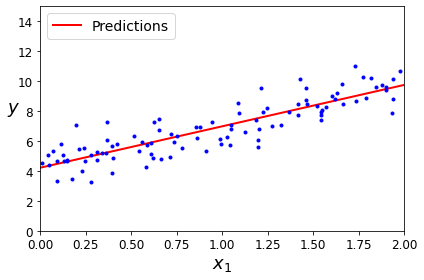

In [7]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

Réaliser une Régression Linéaire en utilisant Scikit-Learn est simple (à noter que sklearn sépare le terme de biais (`intercept_`) des poids des caractéristiques (*feature weights*)):

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

La classe `LinearRegression` est basée sur la fonction `scipy.linalg.lstsq()` (*least square*), qu'on peut appeler directement :

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

Cette fonction calcule $\hat{\theta} = X^{+}y$ où $X^{+}$ est le *pseudoinverse* de X (l'inverse de Moore-Penrose). On peut utiliser `np.linalg.pinv()` pour calculer le pseudoinverse directement :

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

Le pseudoinverse en lui-même est calculé à l'aide d'une technique de factorisation matricielle standard appelée SVD (*Standard Value Decomposition*) qui peut décomposer la matrice du JdE **X** en une matrice de multiplication de trois matrices $U \sum V^{⊺}$ (voir `numpy.linalg.svd()`).

Le pseudoinverse est calculé comme $X^{+} = \sum^{+}U^{⊺}$. Pour calculer la matrice **$\sum^{+}$**, l'algorithme prend **$\sum$** et mets à 0 toutes les valeurs plus petites qu'une minuscule valeur seuil, et remplace toutes les valeurs différentes de 0 par leur inverse, pour finalement les transpoer dans la matrice résultante.

Cette approche est plus efficace que de calculer l'équiation normale, et permet se charger des cas extrêmes d'une bonne manière : en effet, l'équation normale ne marche pas si la matrice $X^{⊺}X$ n'est pas inversible (c'est à dire singulière), comme si m < n ou si certaines caractéristiques (*features*) sont redondantes, mais que la pseudo-inverse est toujours définie.

### Complexité Computationnelle

L'équation normale caclue l'inverse de $X^{⊺}X$, qui est une matrice $(n+1)*(n+1)$ (où $n$ est le nombre de caractéristiques (*features*)). La *complexité computationnelle* de l'inversion d'une telle matrice est typiquement en $O(n^{2.4})$ ou $O(n^{3})$, dépendemment de l'implémentation. En d'autres termes, si on double le nombre de caractéristiques (*features*), on multiplie le temps de calcul par environ $2^{2.4} = 5.3$ à $2^{3} = 8$.

L'approche SVD utilisée par la classe `LinearRegression` de Scikit-Learn est en $O(n^{2})$. Si on double le nombre de caractéristiques (*features*), on multiplie le temps de calcul par 4.

*Attention* : aussi bien l'Équation Normale que l'approche SVD sont très lentes quand le nombre de caractéristiques (*features*) devient grand (environ 100 000). Mais elles sont toutes les deux linéaires en ce qui concerne le nombre d'instances du JdE ($O(m)$), donc elles prennent très bien en charge les grands JdE, à condition qu'on puisse les mettre en mémoire.

De plus, une fois qu'on a entraîné nos modèles de Régression Linéaire, les prédictions sont très rapides : la complexité computationnelle est linéaire aussi bien au regard du nombre d'instances qu'on veut prédire ainsi que le nombre de *features*.

On va maintenant s'intéresser à d'autres manières bien différentes d'entraîner un modèle de Régression Linéaire, qui seront plus adaptées pour des cas où on a un grand nombre de *features* ou trop d'instances d'entraînement pour rentrer en mémoire.

## Descente de gradient (*Gradient descent*)

La descente de gradient est un algorithme générique d'optimisation  capable de trouver des solutions optimales à un large champ de problèmes. L'idée générale est de modifier les paramètres de manière itérative afin de minimiser une fonction de coût.

Elle mesure le gradient local de la fonction d'erreur par rapport au vecteur paramètre $\theta$, et va dans le sens du gradient descendant. Une fois la pente nulle, on atteint un minimum.

Concrètement, on commence par remplir $\theta$ de valeurs aléatoires (c'est ce qu'on appelle l'*initialisation aléatoire* (*random initialization*)). Ensuite, on l'améliore graduellement, pas à pas, chaque pas essayant de réduire le coût de la fonction (ex : MSE), jusqu'à ce que l'algorithme *converge* vers un minimum.

Un paramètre important de la descente de gradient est la taille des pas, determinée par l'hyperparamètre *taux d'apprentissage* (*learning rate*). Si le taux d'apprentissage est trop petit, alors l'algo va devoir passer par de nombreuses itérations pour converger, ce qui prendra un certain temps.

Si le taux d'apprentissage est trop élevé, on peut "sauter" de l'autre côté, et même plus haut qu'avant. Cela va faire diverger l'algorithme, avec valeurs de plus en plus larges, l'empêchant de trouver une bonne solution.

Enfin, il faut savoir que toutes les fonctions ressemblent à un bol régulier. Il peut y avoir des trous, des crêtes, et des irrégularités, rendant la convergence vers le minimum difficile. On se retrouve parfois un minimum local qui empêche d'accéder au minimum global, en fonction de là où l'algo a commencé, ou encore avec des plateau qui font stagner la recherche.

Heureusement, la fonction de coût MSE pour une Régression Linéaire est une *fonction convexe*, ce qui veut dire que si on prend au hasard deux points dans la courbe, la ligne qui le rejoint ne va jamais croiser la courbe. Cela implique qu'il y a seulement un minimum global et pas de minimum local. C'est également une fonction avec une pente qui ne change jamais de manière abrupte. Ces deux faits ont une très bonne conséquence : la Descente de Gradient garanti qu'on va approcher arbitrairement du minimum global (si on attend suffisamment longtemps et si le taux d'apprentissage n'est pas trop élevé).

En fait, la fonction de coût a la forme d'un bol qui peut être allongé si les *features* ont des échelles très différentes, ce qui va faire que dans ce cas, il mettra beaucoup plus de temps à atteindre le minimum global. Quand on utilse la Descente de Gradient, il vaut mieux s'assurer qu'on a des *features* avec les mêmes échelles pour éviter ce problème.

Entraîner un modèle implique de chercher une combinaison de paramètres du modèle qui minimisent une fonction de coût (sur le JdE). C'est une recherche dans l'*espace des paramètres* : plus un modèle a de paramètres, plus l'espace a de dimensions, et plus dure est la recherche.

### Descente de gradient de lot (*Batch Gradient Descent*)

Pour implémenter la descente de gradient, on doit calculer le gradient de la fonction de coût pour chaque paramètre $\theta_{j}$ du modèle. Autrement dit, on doit calculer de combien va changer la fonction de cout si on change $\theta_{j}$ juste un peu. C'est ce qu'on appelle une *dérivée partielle*.

L'équation suivante calcule la dérivée partielle de la fonction de coût par rapport au paramètre $\theta_{j}$, noté $\partial MSE(\theta) / \partial{\theta_{j}}$ :

$$
\frac{\partial}{\partial{\theta_{j} }}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m}(\theta^{⊺}x^{(i)} - y^{(j)})x_{j}^{i}
$$

Au lieu de calculer ces dérivées partielles individuellement, on peut toutes les calculer d'un coup. Le vecteur gradiant, noté $∇_{\theta} MSE(\theta)$ contient toutes les dérivées partielles de la fonction de coût (une pour chaque paramètre du modèle).

Une fois qu'on a notre vecteur gradient, qui pointe en haut, il faut juste aller dans l'autre direction et aller vers le bas. Cela implique de soustraire $∇_{\theta} MSE(\theta)$ de $\theta$. C'est ici que le taux d'apprentissage $\eta$ rentre en jeu : multiplier le vecteur gradient par $\eta$ pour déterminer la taille du pas vers le bas.

Regardons l'implémentation de cet algorithme :

In [12]:
eta = 0.1   # taux d'apprentissage
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)   # initialisation aléatoire

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

In [13]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

On retrouve exactement le même résultat qu'avec l'Équation Normale. La descente de gradient a parfaitement fonctionné.

Mais que se serait-il passé si on avai utilisé un taux d'apprentissage $\eta$ différent ? Regardons pour trois *eta* différents (les lignes en pointillés représentent le point de départ):

In [14]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0 ,15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


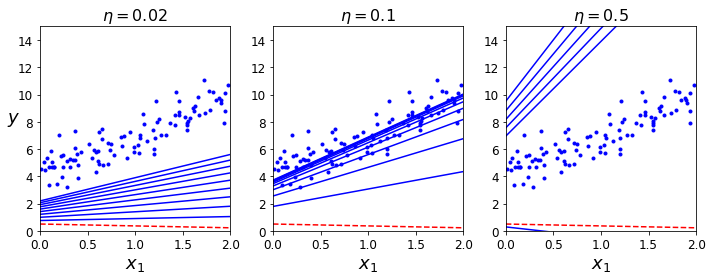

In [15]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

Sur la gauche, le taux d'apprentissage est trop bas : l'algo va finir par atteindre une solution, mais cela va prendre beaucoup de temps.

Au milieu, le taux d'apprentissage est très bon : en seulement quelques itérations, on converge déjà vers une solution.

À droite, le taux d'apprentissage est trop élevé : l'algo diverge, fait des "sauts" et s'éloigne de plus en plus de la solution à chaque pas.

Pour trouver le bon taux d'apprentissage, on peut utiliser la *grid search* (cf Ch2). Cependant, on peut vouloir limiter le nombre d'itérations pour que la *grid search* puisse éliminer les modèles qui vont mettre trop de temps à converger.

On peut se demander comment définir le nombre d'itérations. Si c'est trop bas, on risque de rester trop loin de la solution optimale quand l'algo s'arrête ; mais s'il est trop haut, on va perdre du temps alors que les paramètres du modèle ne changent plus. Une solution simple est de fixer un très grand nombre d'itération et d'interrompre l'algo quand le vecteur gradient (*gradient vector*) devient minuscule, c'est à dire quand sa norme devient inférieure à un très petit nombre $\epsilon$ appelé *tolérance*, parce que c'est ce qui se produit quand la Descente de gradient a (presque) atteint le minimum.

### Convergence Rate

Quand la fonction de coût est convexe et que sa pente ne change pas de manière abrupte (comme c'est le cas avec la fonction de coût MSE), le *batch gradient descent* avec un taux d'apprentissage fixe va finir par converger vers la solution optimale, mais cela peut prendre beaucoup de temps : ça peut prendre $O(1/\epsilon)$ itérations pour atteindre le point optimal dans une fourchette $\epsilon$, en fonction de la forme de la fonction de coût. Si on doit diviser la tolérance ($\epsilon$) par 10, pour avoir une solution plus précise, alors l'algorithme peut avoir à tourner 10 fois plus longtemps.


## Décente de gradient stochastique (*Stochastic gradient descent*)

Le problème principal avec la *batch gradient descent* est qu'elle utilise tout le JdE pour calculer les gradients à chaque étape, ce qui la rend très lente quand on a un gros JdE.

A l'opposé, la *sotchastic gradient descent* choisit aléatoirement une instance du JdE à chaque étape et calcule le gradient basé sur cette seule instance. Cela fait gagner énormément de temps parce que l'algo n'a a travailler qu'avec très peu de données à chaque itération. Cela permet aussi de travailler sur des très gros JdE, puisque seulement une seule instance a besoin d'être en mémoire à chaque itération (le SGD peut être implémenté comme un algo *out-of-core*).

D'un autre côté, à cause de sa nature stochastique (c'est-à-dire aléatoire), c'est algorithme est beaucoup moins régulier que le BGD : au lieu de décroître doucement jusqu'à ce qu'il atteigne le minimum, la fonction de coût va sauter de haut en bas, décroissement seulement en moyenne. Avec le temps, la fonction va finir par arriver vers le minimum, mais même à ce moment, elle va continuer à "sauter", sans jamais s'arrêter. Donc une fois que l'algo s'arrête, les valeurs des paramètres sont bonnes, mais pas optimales.

Quand la fonction de coût est très irrégulière, cela peut en fait aider l'algo à sortir des minima locaux, donc le SGD a une meilleure chance de trouver un minimum global que le BGD.

Ainsi, le hasard est une bonne chose pour échaper d'un optimal local, mais mauvais parce qu'il implique que l'algo ne peut jamais se stabiliser à un minimum. Une solution à ce problème est de graduellement réduire le taux d'apprentissage. Les pas commencent en étant grand (ce qui permet de faire des progrès rapides et d'échapper au minima locaux), puis deviennent de plus en plus petit, permettant à l'algo de se stabiliser au minimum global. Ce procédé est proche du *simulated annealing* (recuit simulé), un algo inspiré du recuit en métallurgie, où le métal en fusion est refroidi lentement. La fonction qui détermine le taux d'apprentissage à chaque itération est appelée *learning schedule*. Si le taux d'apprentissage est réduit trop rapidement, on peut se retrouver bloqué dans un minimum local, ou même bloqué à mi-chemin du minimum. Si le taux d'apprentissage est réduit trop lentement, on peut sauter autour du minimum pendant un long moment et se retrouver avec une solution sous optimale si on arrête l'entraînement trop tôt.

Le code suivant implémente une SGD utilisant une *learning schedule* simple. Par convention, on itère par tour de $m$ itérations, chaque tour étant appelé une *epoch*.

In [16]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving figure sgd_plot


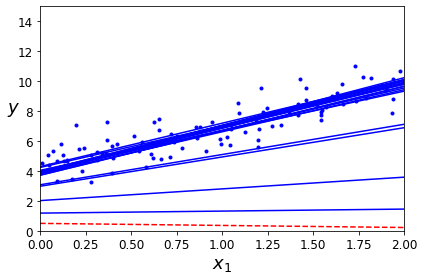

In [17]:
n_epochs = 50
t0, t1 = 5, 50  # hyperparamètres du learning schedule

def learning_schedule(t):
    return t0 / (t +t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

Le graphe ci-dessus montre les 20 premières étapes de l'entraînement ; notons l'irrégularité des étapes.

Alors que le code du BGD itérait 1000 fois sur tout le jeu d'entraînement, ce code ne passe par le jeu d'entraînement que 50 fois et atteint une très bonne solution.

In [18]:
theta

array([[4.21076011],
       [2.74856079]])

Comme les instance sont choisies aléatoirement, certaines instances peuvent être choisies plusieurs fois par *epoch*, alors que d'autres peuvent ne pas l'être du tout. Si on veut être sûr que l'algo passe par toutes les instances à chaque *epoch*, une autre approche est de mélanger le JdE (il faut s'assurer de mélanger la caractéristique d'entrée *input feature* et les labels conjointement), puis passer instance par instance, mélanger à nouveau, et ainsi de suite. Cepndant, cette approche à une convergence plus lente.

**Attention** : Quand on utilse une SGD, les instances d'entraînement doivent être indépendantes et identiquement distribuées (IID) pour s'assurer que les paramètres soient tirés vers l'optimum global en moyenne. Une manière simple de s'assurer cela est de mélanger les instances pendant l'entraînement, par exemple en choisissant une instance aléatoirement, ou en faisant un mélange sur le JdE au début de chaque *epoch*. Si on ne mélange pas les instances, par exemple si elles sont triées par label, alors le SGD va commencer par optimiser pour un label, puis le suivant, et ainsi de suite, et il ne va jamais se stabiliser proche du minimum global.

Pour faire une Régression Linéaire en utilisant le SGD avec Scikit-Learn, on peut utiliser la classe `SGDRegressor` qui par défaut optimise l'erreur au carré de la fonction de coût.

Le code suivant tourne pour un maximum de 1000 *epochs* ou jusqu'à ce que la perte tombe à moins de 0.001 pendant une *epoch* (`max_iter=100, tol=1e-3`). Il commence avec un taux d'apprentissage de 0.1 (`eta0=0.1`) en utilisant le *learning schedule* par défaut (différent de celui d'avant). Enfin, il n'ytilise aucune régularisation (`penalty=None`) :

In [19]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

Une fois de plus, on trouve une solution très porhce de celle retournée par l'Équation Normale :

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

## Mini-batch Gradient descent

Le dernier algo de GD qu'on va regarder est le *mini-batch gradient descent* (mBGD).

À chaque étape, au lieu de calculer le gradient en se basant sur tout le JdE (comme dans le BGD), ou seulement sur une instance (comme le SGD), le mBGD calcule les gradients sur un petit jeu d'instances aléatoires appelé *mini-batch*. L'avantage principal du mBGD sur le SGD est qu'on peut obtenir un boost des performance à partir d'optiisation hardware pour les opérations sur les matrices, particulièrement si on utilise les GPU.

La progression de l'algorithme dans le paramètre spacial est moins erratique qu'avec le SGD, particulièrement avec des mini-batches particulièrement gros. Résultat, la mBGD va terminer en tournant un peu plus proche du minimum que le SGD, mais ce sera peut-être plus dur pour lui de fuir les minima locaux (dans le cas de problèmes qui peuvent souffrir de minima locaux, ce qui n'est pas le cas de la régression linéaire).

In [21]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) -yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [22]:
theta

array([[4.25214635],
       [2.7896408 ]])

Regardons à présent les chemins pris par nos trois algo GD dans l'espace des paramètres durant l'entraînement :

In [23]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


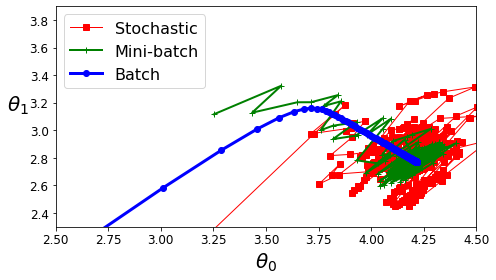

In [24]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

Les trois chemins finissent près du minium, mais BGD s'arrête au minimum, alors que SGQ et mBGD continuent tout les deux à tourner autour. Cependant, il ne faut pas oublier que la BGD prend beaucoup de temps à chaque étape, et que SGD et mBGD peuvent aussi atteindre le minimum si on utilise un bon *learning schedule*.

Comparons les algorithmes qu'on a vu pour la Régression Linéaire ($m$ est le nombre d'instances d'entraînement et $n$ le nombre de caractéristiques) :

| Algorithme       | m grand | Support OoC | n grand | Hp | scalling required | Scikit-Learn       |
|------------------|---------|-------------|---------|----|-------------------|--------------------|
| Équation normale | rapide  | non         | lent    | 0  | non               | N/A                |
| SVD              | rapide  | non         | lent    | 0  | non               | `LinearRegression` |
| BGD              | lent    | non         | rapide  | 2  | oui               | `SGDRegressor`     |
| SGD              | rapide  | oui         | rapide  | ≥2 | oui               | `SGDRegressor`     |
| mGD              | rapide  | oui         | rapide  | ≥2 | oui               | `SGDRegressor`     |


## Régression polynomiale (*Polynomial Regression*)

Et si nos données étaient plus complexes qu'une simple ligne ? Étrangement, on peut utiliser un modèle linéaire pour ajuster des données non linéaires. Une manière simple de faire ça est d'ajouter les puissances de chaque caractéristique comme de nouvelles caractéristiques, puis d'entraîner un modèle linéaire sur ce jeu de caractéristiques étendu. Cette technique est appelée la *Régression polynomiale*.

Exemple : d'abord, générons des données non-linéaires, basées sur une simple *équation quadratique* ($y = ax^{2} + bx + c$)  et du bruit :

In [31]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


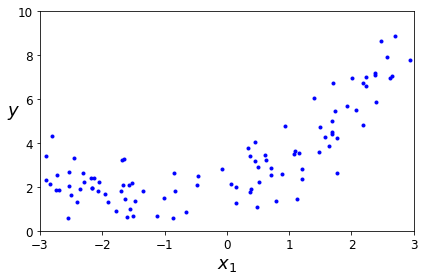

In [32]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

Une ligne droite ne s'ajustera jamais à ce genre de données. Donc nous allons utiliser la classe `PolynomialFeatures` de Scikit-Learn pour transformer nos données d'entraînement, ajouter le carré (second degré polynomial) de chaque caractérisitques dans le JdE en tant que nouvelle caractéristiques. 

In [33]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.62278195])

In [34]:
X_poly[0]

array([0.62278195, 0.38785736])

`X_poly` contient maintenant les caractéristiques originales de X plus le carré de ces caractéristiques. On peut maintenant entraîner un modèle `LinearRegression` à ces données d'entraînement étendues.

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.95163088]), array([[0.96364196, 0.4388373 ]]))

Saving figure quadratic_predictions_plot


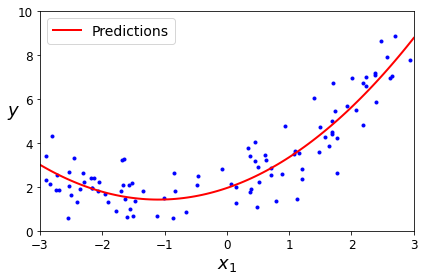

In [36]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

On a une estimation très proche de notre fonction d'origine.

Il est à noter que lorsqu'on a plusieurs caractéristiques, la Régression Polynomiale est capable de trouver des relations entre les caractéristiques (ce qui est quelque chose que la Régression Linéaire ne permet pas). Ceci est rendu possible par le fait que `PolynomialFeatures` ajoute aussi toutes les combinaisons de caractéristiques jusqu'au degré fournit. Par exemple, s'il y avait deux caractéristiques $a$ et $b$, `PolynomialFeature` avec `degree=3` n'ajouterai pas seulement les caractéristiques $a^{2}$, $a^{3}$, $b^{2}$ et $b^{3}$, mais également les combinaisons $ab$, $a^{2}b$ et $ab^{2}$.

*Attention* : `PolynomialFeatures(degree=d)` transforme un tableau contenant $n$ caractéristiques en un tableau contenant $(n+d)! / d!n!$ caractéristiques. Attention à l'explosion combinatoire du nombre de caractéristiques !


## Courbes d'apprentissage (*Learning Curves$)

Si on effectue une Régression Polynomiale de haut degré, on ajustera probablement beaucoup mieux les données d'entraînement qu'avec la régression linéaire simple. Par exemple, la figure suivante applique un modèle polynomial à 300 degrés, et compare le résultat avec un modèle linéaire pur et un modèle quadratique (polynomial deux degrés). On peut remarquer comme le modèle polynomial à 300 degrés s'agite autour pour être aussi proche que possible des instances d'entraînement.

Saving figure high_degree_polynomials_plot


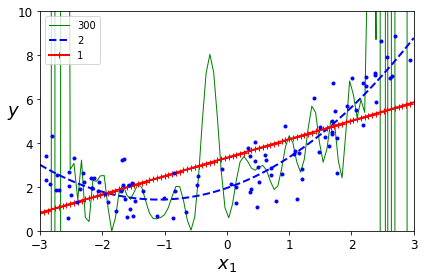

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
        ])

    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

Ce modèle de Régression Polynomiale à haut degré est en train de faire un très important *overfitting* des données d'entraînement, alors que le modèle linéaire fait un *underfitting*. Le modèle qui va le mieux généraliser dans ce cas est le modèle quadratique, ce qui est plutôt censé étant donné qu'on a généré les données en utilisant un modèle quadratique.

Cependant, on ne saura pas en général quelle fonction a généré les données, donc comment peut-on décider de la complexité du modèle qu'on veut ? Comment peut-on dire que notre modèle over/underfit nos données ?

Au chapitre 2, on a utilisé la validation croisée pour avoir une estimation des performances du modèle. Si un modèle fonctionne bien sur des données d'entraînement mais généralise mal selon les mesures de la validation croisée, alors le modèle *overfit*. S'il fonctionne mal sur les deux, alors on *underfit*. C'est une manière de dire si un modèle est trop simple ou trop complexe.

Une autre manière de le dire est de regarder les *courbes d'apprentissage* : ce sont des graphes des performance du modèle sur le JdE et le JdV en tant que fonction de la taille du JdE (ou des itérations d'entraînement). Pour générer ces graphes, il faut entraîner le modèle plusieurs fois sur des sous-jeu de différentes taille du JdE. Le code suivant définit une fonction qui, étant donné des des données d'entraînement, une fonction qui trace les courbes d'apprentissage d'un modèle.

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Regardons la courbe d'apprentissage du modèle de Régression Linéaire :

Saving figure underfitting_learning_curves_plot


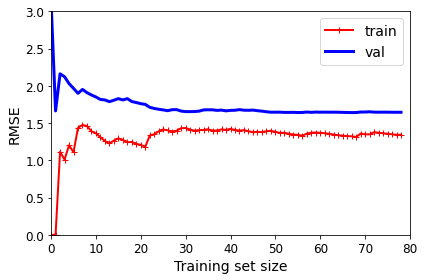

In [45]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

Ce modèle qui underfit mérite une explication. D'abord, regardons la performance sur les données d'entraînement : quand il y a seulement une ou deux instances dans le JdE, le modèle les ajuste parfaitement ; c'est pourquoi la courbe commence à 0. Mais au fur et à mesure que des instances sont ajoutées au JdE, il devient impossible pour le modèle de les ajuster parfaitement, à la fois parce que les données ont du bruit, et parce que ce n'est pas linéaire du tout. Donc l'erreur sur les données d'entraînement augmente jusqu'à atteindre un plateau, point à partir duquel ajouter des nouvelles instances au JdE ne rend pas l'erreur moyenne meilleure ou pire.

Maintenant, regardons les perfomrances du modèle sur les données de validation. Quand le modèle est entraîné sur très peu d'instances d'entraînement, il est incapable de généraliser correctement ;  c'est pourquoi l'erreur de validation est initiallement grande. Puis, à mesure qu'on montre de plus en plus d'exemple d'entraînement au modèle, il apprend, et donc l'erreur de validation diminue lentement. Cependant, une fois de plus, l'erreur se termine sur un plateau, très proche de l'autre courbe.

Ces courbes d'apprentissages sont typique d'un modèle qui underfit. Les deux courbes atteignent un plateau; elles sont proches et très hautes.

*Conseil* : si un modèle underfit les données d'entraînement, ajouter des exemples d'entraînment n'aidera pas. Il faut utiliser un modèle plus complexe ou choisir de meilleurs caractéristiques.

Maintenant regardons les courbes d'apprentissage d'un modèle polynomial à 10 degrés sur les mêmes données :

Saving figure learning_curves_plot


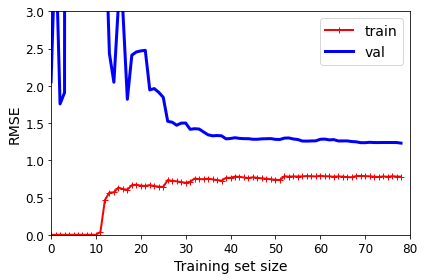

In [47]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

Ces courbes ressemblent un peu au modèle précédent, mais il y a deux différences majeures :
- L'erreur sur les données d'entraînement est beaucoup plus basse qu'avec le modèle de Régression Linéaire
- Il y a un écart entre les courbes. Cela veut dire que le modèle a une bien meilleure performance sur les les données d'entraînement que sur les données de validation, ce qui est la marque d'un modèle qui *overfit*. Si on utilisait un JdE beaucoup plus grand, cependant, les deux courbes continueraient à se rapprocher.

### Le compromis biais/variance

Un résultat théorique important des statistiques et du ML est le fait que l'erreur de généralisation d'un modèle peut être exprimée comme la somme de trois erreurs très différentes :

- ***Biais*** : 
Cette partie de l'érreur de généralisation est due à de fausses suppositions, comme supposer que les données sont linéaires alors qu'elle sont en fait quadratiques. Un modèle à biais élevé est plus susceptible de *underfit* les données d'apprentissage.

- ***Variance*** : 
Cette partie est due à une trop grande sensibilité du modèle à de petites variations dans les données d'entraînement. Un modèle avec beaucoup de degrés de liberté (comme un modèle polynomial de degré élevé) aura tendance a avoir une grande variance et donc d'*overfit* les données d'entraînement.

- ***Erreur irreductible (irreducible error)*** : 
Cette partie est due au bruit des données elles-mêmes. Le seul moyen de réduire cette partie de l'erreur est de nettoyer les données (c'est-à-dire fixer la source des données, comme un capteur cassé, ou de détecter et retirer les *outliers*).

Améliorer la complexité du modèle va typiquement *augmenter sa variance et réduire son biais*. Inversement, réduire la complexité d'un modèle va *augmenter son biais et réduire sa variance*. C'est pour ça qu'on appelle cela un compromis.


## Modèle Linéaires Régularisés (*Regularized Linear Models*)

Comme on a pu le voir aux Ch1 et 2, une bonne manière de réduire l'*overfitting* est de régulariser le modèle (le contraindre) : moins il aura de degrés de liberté, plus il lui sera difficile d'*overfit*. Une manière simple de régulariser un modèle polynomial est de réduire le nombre de degré polynomiaux.

Pour un modèle linéaire, la régularisation est typiquement réalisée en contraignant les poids du modèles.

On va maintenant regarder la Régression de la Crête (*Ridge Regression*), la Régression au Lasso (*Lasso Regression*) et le Filet élastique (*Elastic Net*), qui implémentent trois différentes manières de contraindres les poids.

### Ridge Regression

La *Ridge Regression* (RR) est une version régularisée de la Régression Linéaire : un *terme régularisé* équal à $\alpha\sum_{i=1}^{n}\theta_{i}^{2}$ est ajouté à la fonction de coût. Cela force l'algo d'apprentissage à non seulement ajuster les données mais aussi de garder les poids du modèle aussi petits que possibles. À noter que le terme de régularisation ne devrait être ajouté à la fonction de coût que pendant l'entraînement. Une fois le modèle entraîné, on va vouloir utiliser les mesures de performances non régularisées pour évaluer les performances du modèle.

*Remarque* : Il est très courant pour une fonction de coût utilisée pendant l'entraînement d'être différente de la mesure de performance utilisée pendant le test. A part a régularisation, une autre raison qu'elles soient différentes est qu'une bonne fonction de coût d'entraînement devrait avoir des dérivées adaptées à la régularisation, alors que la mesure de performance utilisée pour tester devrai être aussi proche que possible de l'objectif final. Par exemple, les classificateurs sont souvent entraînés en utlisant une fonction de coût comme la perte de log (*log loss*) mais évaluée en utilisant la *précision/rappel*.

L'hyperparamètre $\alpha$ contrôle à quel point on veut régulariser le modèle. Si $\alpha=0$ alors la Ridge Regression est juste une Régression Linéaire. Si $\alpha$ est très grand, alors tous les poids finiront par être très proches de zéro, et le résultat sera une ligne plate traversant la moyenne des données.

*Fonction de coût de la Ridge Regression :*
$$
J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^{n}\theta_{i}^{2}
$$

À noter que le terme de biais $\theta_{0}$ n'est pas régularisé (la somme commence à $i=1$, pas $0$). Si on définit $w$ comme le vecteur de poids de la caractéristique ($\theta_{1}$ à $\theta_{n}$) alors le terme de régularisation est égal à $\frac{1}{2}(||w||_{2})^{2}$ où $||w||_{2}$ représente la norme $l_{2}$ du vecteur poids. Pour la GD (Gradient Descent), il faut juste ajouter $\alpha w$ au vecteur gradient MSE.

*Attention* : Il est important te mettre  l'échelle les données (en utilisant `StandardScaler`) *avant* de réaliser une Ridge Regression, car elle est très sensible à l'échelle des caractéristiques d'entrée (*input features*). Ceci est vrai sur la plupart des modèles régularisés.

On va maintenant voir plusieurs modèles Ridge entraîné sur quelques données linéaires utilisant différentes valeurs $\alpha$.


In [48]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

Voici comment réaliser une Ridge Regression avec Scikit-Learn en utilisant une solution de forme fermée :

In [49]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [50]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

Saving figure ridge_regression_plot


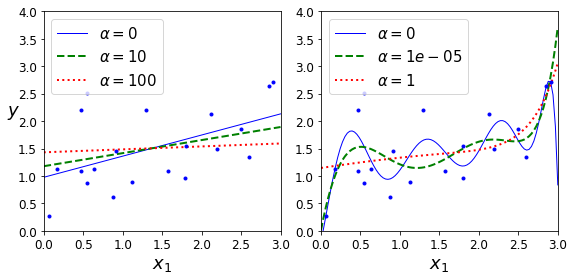

In [53]:
from sklearn.linear_model import Ridge
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

Sur la gauche, de simple modèles Ridge sont utilisés, menant à des prédictions linéaires. Sur la droite, les données sont d'abord étendeues en utilisant `PolynomialFeatures(degree=10)`, puis elles sont mis à l'échelle en utilisant `StandardScaler`, et enfin les modèles Ridge sont appliqué aux *features* résultantes : c'est une Régression Polynomiale avec régularisation Ridge. À noter comment augmenter $\alpha$ conduit à applatir (c'est-à-dire moins extrême, plus raisonnable) les prédictions, réduisant ainsi la variance du modèle mais augmentant ses biais.

Comme avec la Régression Linéaire, on peut effectuer une Ridge Regression soit en calculant l'équation de forme fermée, ou en faisant un GD. Les avantages et inconvénients sont les mêmes. L'équation suivante montre la solution fermée, où **A** est la *matrice d'identité* $(n+1)*(n+1)$, mais avec un 0 dans sa cellule supérieure gauche, correspondant au terme de biais.

$$
\hat{\theta} = (X^{⊺}X + \alpha A)^{-1} X^{⊺}y
$$

Voici comment réaliser une Ridge Regression en utilisant Scikit-Learn en utilsant la solution fermée (un variant de l'équation précédente qui utilise une technique de matrice de factorisation de Cholesky) :

In [55]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

Et en utilisant la SGD :

In [58]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.4717882])

L'hyperparamètre de pénalité défini le type de terme de régularisation à utiliser. Spécifier `l2` indique qu'on veut que la SGD ajoute un terme de régularisation à la fonction de coût égal à la moitié du carré de la norme $l_{2}$ du vecteur de poids : c'est tout simplement la Ridge Regression.

### Lasso Regression

La *Lasso Regression*, de son vrai nom *Least Absolute Shrinkage and Selection Operator Regression* est une autre version régularisée de la Régression Linéaire : comme la Ridge Regression, elle ajoute un terme de régularisation à la fonction de coût, mais elle utilise la norme $l_{1}$ du vecteur de poids au lieu de la moitié du carré de la norme $l_{2}$.

*Fonction de coût de la Lasso Regression*
$$
J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^{n}|\theta_{i}|
$$

/home/remycosta/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


Saving figure lasso_regression_plot


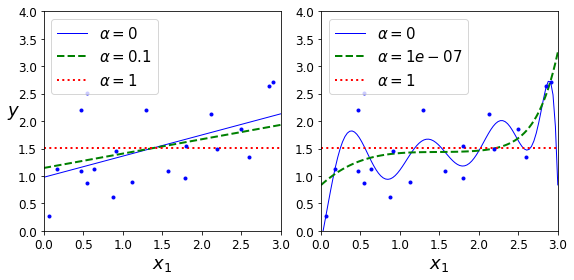

In [59]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

Ces graphes montrent les mêmes choses que dans les graphes précédents, mais en remplacement les modèles Ridge par des modèles Lasso en utilisant les mêmes valeurs pour $\alpha$.

Une importante particularité de la Lasso Regression est qu'elle tend à éliminer les poids des caractéristiques les moins importantes (c'est-à-dire les mettre à $0$). Par exemple la ligne en trait dans le graphe de droite (où $\alpha = 10^{-7}$) semble quadratique, presque linéaire : tout le poids pour les caractérisitques polynomiales de degré élevé sont égales à $0$. En d'autres termes, la Lasso Regression réalise automatiquement la sélection des *features* et donne en sortie un *sparse model* (c'est-à-dire avec quelques poids de *features* qui ne valent pas 0).

La fonction de coût de Lasso n'est pas différentiable à $\theta = 0$ (pour $i = 1, 2, \cdots, n$), mais la GD fonctionne bien si on utilise un *vecteur sous-gradient* **g** (On peut considérer un vecteur sous-gradient à un point non différentiable comme un vecteur intermédiaire entre les vecteurs de gradient autour de ce point) à la place quand tout $\theta_{i} = 0$.

)

*Equation du Vecteur sous-gradient de la Régression Lasso*
$$
g(\theta, J) = ∇_{\theta}MSE(\theta) + \alpha
\left(\begin{array}{cc} 
sign(\theta_{1}) \\
sign(\theta_{2}) \\
\cdots \\
sign(\theta_{n}) \\
\end{array}\right)

\space \text{où} \space

sign(\theta_{i}) =
  \begin{cases}
  -1 & \text{if} & \theta_{i} < 0 \\
  0 & \text{if} & \theta_{i} = 0 \\
  -1 & \text{if} & \theta_{i} > 0 \\
  \end{cases}
$$

Voici un petit exemple Scikit-Learn utilisant la classe `Lasso` :

In [61]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

À noter qu'on peut utiliser à la place `SGDRegression(penalty="l1")`.

### Elastic Net

L'Elastic net est entre la Régression Ridge et la Régression Lasso. Le terme de régularisation est un simple mélange entre les termes de régularisation Ridge et Lasso, et on peut contrôler le ratio de mélange $r$. Quand $r=0$, l'Elastic net est équivalent à la Régression Ridge, et quand $r=1$, il est équivalent à la Régression Lasso.

*Fonction de coût de l'Elastic Net*
$$
J(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^{n}|\theta_{i}| + \frac{1-r}{2}\alpha\sum_{i=1}{n}\theta_{i}^{2}
$$

Quand doit-on utiliser la simple Régression Linéaire (sans régularisation), Ridge, Lasso, ou Elastic Net ?

Il est toujours préférable d'avoir au moins un peu de généralisation, donc il on devrait en général éviter la Régression Linéaire. Ridge est bien par défaut, mais si on suspecte que seulement quelques *features* sont utiles, on devrait préférer Lasso ou Elastic Net, parce qu'ils ont tendance à réduire le poids des *features* inutiles à $0$. En règle générale, Elastic Net est préféré à Lasso parce que Lasso peut se comporter de manière erratique quand le nombre de *features* est plus grand que le nombre d'instances d'entraînement ou quand plusieurs *features* sont fortement corrélées.

Voici un court exemple qui utilise la classe `ElasticNet` de Scikit-Learn (`l1_ratio` correspond au ratio de mélange $r$) :

In [62]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,  l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Arrêt précoce (*early stopping*)

Une manière très différente de régulariser les algorithmes d'apprentissages itératifs comme la GD est d'arrêter l'entraînement dès que l'erreur de validation atteint un minimum. C'est ce que l'on appelle un arrêt précoce (*early stopping*).

In [63]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

Voici une implémentaiton simple de l'arrêt précoce :

In [65]:
from sklearn.base import clone

# préparer les données
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(
    max_iter=1, 
    tol=-np.infty, 
    warm_start=True,
    penalty=None,
    learning_rate="constant",
    eta0=0.0005,
    random_state=42
    )

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

À noter qu'avec `warm_start=True`, quand la méthode `fit()` est appelée, elle continue l'entraînement où elle l'avait laissé, au lieu de repartir de zéro.

Création du graphe :

Saving figure early_stopping_plot


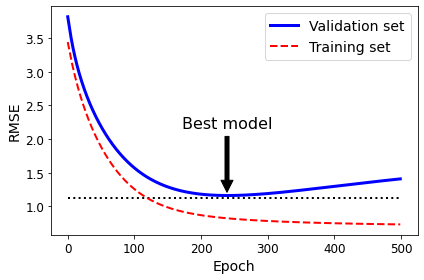

In [67]:
sgd_reg = SGDRegressor(
    max_iter=1,
    tol=-np.infty,
    warm_start=True,
    penalty=None,
    learning_rate="constant",
    eta0=0.0005,
    random_state=42
)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range (n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

In [68]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

Le graphe montre un modèle complexe (modèle de Régression polynomiale de degré élevé) entraîné par un BGD. À mesures que les *epochs* vont, l'algorithme apprend, et sa prédiction d'erreur (RMSE) sur le JdE descend, en même temps que son erreur de prédiction sur le JdV. Après un certain temps, l'erreur de validation arrête de diminuer et commence à remonter. Cela indique que le modèle *overfit* les données d'entraînement.

Avec un arrêt précoce, on peut simplement arrêter l'entraînement dès que l'erreur de validation atteint son minimum. C'est une technique tellement simple et efficace qu'elle est appelée "*beautiful free lunch*".

*Remarque* : avec SGD et mBGD, les courbes ne sont pas aussi douces, et il peut être difficile de savoir si on atteint un minimum ou pas. Une solution est d'arrêter seulement après que l'erreur de validation soit allée plus loin que le minimum pendant quelques temps (quand on pense que notre modèle ne pourra pas faire mieux), puis de remettre les paramètres du modèles au point où l'erreur de validation était au minimum.


In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [70]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# ignoring bias term
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])


Saving figure lasso_vs_ridge_plot


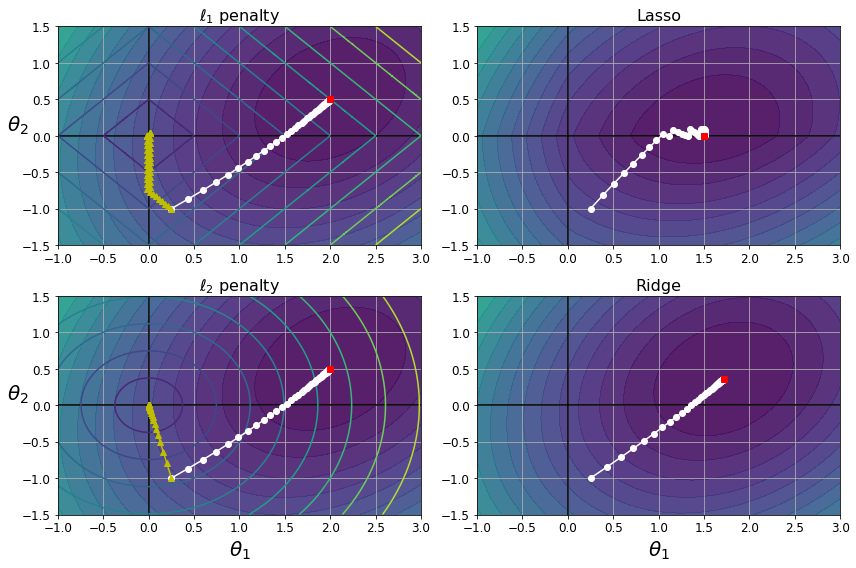

In [71]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)

save_fig("lasso_vs_ridge_plot")
plt.show()


## Régression Logistique

Certains algorithmes de régression peuvent être utilisés pour la classifiction (et inversement). La *Régression Logistique* est communément utilsée pour estimer la probabilité qu'une instance appartienne à une classe particulière (par exemple, quelle est la probabilité que cet email soit du spam ?). Si la probabilité estimée est plus grande que 50%, alors le modèle prédit que l'instance appartient à cette classe (appelée *classe positive*, avec un **label "1"**), autrement, il prédit que ce n'est pas le cas, et qu'elle appartient à la *classe négative*, **label "0"). Cela en fait un *classificateur binaire*.

### Estimation des probabilités

Comment fonctionne la Régression Logistique ? Tout comme un modèle de Régression Linéaire, un modèle de Régression Logistique calcule une somme des poids des *features* d'entrée, plus un terme de biais, mais au lieu de sortir un résultat directement comme le modèle de Régression Linéaire le fait, elle sort la *logistique* de ce résultat.

*Forme vectorisée de l'estimation de la probabilité du modèle de Régression Logistique*
$$
\hat{p} = h_{\theta}(\text{x}) = \sigma(\text{x}^{⊺}\theta)
$$

La **logistique** notée $\sigma(\cdot)$ est une *fonction sigmoïde* (c'est-à-dire en forme de S), qui sort un nombre entre 0 et 1. Elle est définie par l'équation suivante :

*Fonction logistique*
$$
\sigma(t) = \frac{1}{1 + \text{exp}(-t)}
$$

Saving figure logistic_function_plot


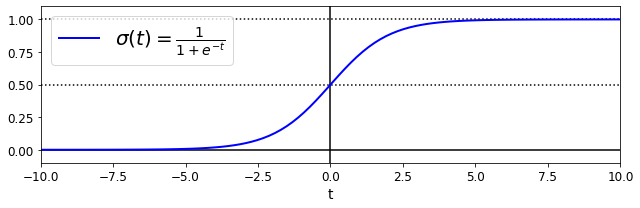

In [73]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

Une fois que le modèle de Régression Logistique a estimé la probabilité $$\hat{p} = h_{\theta}(x)$$ qu'une instance **x** appartienne à la classe positive, il peut faitre la prédiction $\hat{y}$ aisément :

*Prédiction du modèle de Régression Logistique*
$$
\hat{y} =
\begin{cases}
  0 & \text{si} & \hat{y} < 0.5 \\
  1 & \text{si} & \hat{y} \ge 0.5 \\
  \end{cases}
$$

À noter que $\sigma(t) < 0.5$ quand $t < 0$ et $\sigma(t) \ge 0.5$ quand $t \ge 0$, donc un modèle de Régression Logistique prédit 1 si **x**$^{⊺}\theta$ est positif et $0$ si négatif.

*Remarque* : Le score $t$ est souvent appelé $logit$. Le nom vient du fait que la fonction logit, définie $\text{logit}(p) = \log{(p / (1-p))}$, est l'inverse de la fonction logistique. En effet, si on calcule le logt de la probabilité estimée $p$, on va trouver que le résultat est $t$. Le logit est également appelé $log-odds$ puisque c'est le log du ratio entre la probabilité estimée pour une classe positive et la probabilité estimée pour une classe négative.

### Entraînement et fonction de coût

Maintenant on sait comment un modèle de Régression Logistique estime les probabilités et fait ses prédictions. Mais comment est-il entraîné ? L'objectif de l'entraînement est de définir le vecteur paramètre $\theta$ pour que le modèle estime les fortes probabilités pour les instances positives ($y=1$) et les failbe probabilités pour les instances négatives ($y=0$). Cette idée est capturée par la fonction de coût dans l'équation suivant eune une instance unique d'entraînement **x** :

*Fonction de coût d'une instance d'entraînement unique*
$$
c(\theta) = 
\begin{cases}
  -\log(\hat{p}) & \text{si} & y=1 \\
  -\log(1 - \hat{p}) & \text{si} & y=0 \\
\end{cases}
$$

Cette fonction de coût fait sens parce que $-\log(t)$ devient très grand quand $t$ approche de $0$, donc le coût sera très grand si le modèle estime une probabilité proche de 0 pour une instance positive, et il sera aussi très grand si le modèle estime une probabilité proche 1 pour une instance négative. Également, $-\log(t) est proche de $0$ pour une instance négative, ou proche de $1$ pour une instance positive, ce qui est précisément ce que l'on veut.

La fonction de coût sur tout le JdE est le coût moyen sur toutes les instances d'entraînement. Cela peut être écrit en une seule équation appelée *log loss* :

*Fonction de coût de la Régression Logistique*
$$
J(\theta) = -\frac{1}{m}\sum_{i=1}^{n}\left[y^{(i)}\log\left(\hat{p}^{(i)}\right) + \left(1 - y^{(i)}\right)\log\left(1-\hat{p}^{(i)}\right)\right]
$$

La mauvaise nouvelle est qu'il n'existe aucune équation de forme fermée connue pour calculer la valeur $\theta$ qui minimise cette fonction de coût (il n'y a pas d'équivalent de l'Équation Normale).
La bonne nouvelle est que cette fonction de coût est convexe, donc la GD (ou tout autre algo d'optimisation) est garanti de trouver le minimum global (si le taux d'apprentissage n'est pas trop grand et qu'on attend assez longtemps). La dérivée partielle de la fonction de coût en regard du $j^{ème}$ paramètre du modèle $\theta_{j}$ est donné par l'équation suivante :

*Dérivée partielle de la fonction de coût logistique*
$$
\frac{\partial}{\partial\theta_{j}}\text{J}(\theta) = \frac{1}{m}\sum_{i=1}^{m}\left(\sigma\left(\theta^{⊺}\text{x}^{(i)})\right) - y^{(i)}\right)x_{j}^{(i)}
$$